<a href="https://colab.research.google.com/github/samapatil1729/Machine-Learning-Practice/blob/main/MLP_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice Assignment 6

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def warn(*args, **kwargs):
  pass
import warnings
warnings.warn = warn

##Question 1

Use MNIST dataset. Store all the samples in X and labels in y.
 
  Use: np.random.seed(42)
  Split the dataset in the following ratio.
 Training : Take the first 70% of samples from X and store them in x_train
 Testing: Take the remaining 30% of samples from X and store them in x_test
  Store the respective labels in y_train,y_test respectively.

   The last training sample is of digit __?


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
np.random.seed(42)

In [ ]:
X, y = fetch_openml('mnist_784', return_X_y = True)

In [ ]:
X = X.to_numpy()
y = y.to_numpy().astype(np.int32)

In [ ]:
x_train = X[:49000]
x_test = X[49000:]
y_train = y[:49000]
y_test = y[49000:]

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
print('The last training sample is of digit :', y_train[-1])

The last training sample is of digit : 6


##Question 2
Build a classifier that differentiates digit 6 from digit 9.

Steps to be followed

Collect all digit-6 (Positive class) and digit-9 (Negative class) images from x_train

 and stack them properly as a single datamatrix 
x_train_69


Keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)

Similarly, collect the respective labels and store it in a variable y_train_69

Set the label values to 1 for positive classes and 0 for negative classes.

Load 
1

from sklearn.utils import shuffle
Shuffle the datamatrix and labels. 
Set 

random_state value to 1729
Create x_test_69 and y_test_69
by repeating the steps from 1 to 6 with required modifications.

What is the sum of all the labels in the vector 
y_train_69

In [ ]:
dig_6_idx = np.where(y_train == 6)[0]
dig_9_idx = np.where(y_train == 9)[0]
index = np.concatenate((dig_6_idx, dig_9_idx), axis = 0)
x_train_69 = x_train[index,:]
y_train_69 = np.concatenate((np.ones(len(dig_6_idx)), np.zeros(len(dig_9_idx))))

In [ ]:
from sklearn.utils import shuffle
x_train_69, y_train_69 = shuffle(x_train_69, y_train_69, random_state = 1729)

In [ ]:
dig_6_idx = np.where(y_test == 6)[0]
dig_9_idx = np.where(y_test == 9)[0]
index = np.concatenate((dig_6_idx, dig_9_idx), axis = 0)
x_test_69 = x_train[index,:]
y_test_69 = np.concatenate((np.ones(len(dig_6_idx)), np.zeros(len(dig_9_idx))))

In [ ]:
x_test_69, y_test_69 = shuffle(x_test_69, y_test_69, random_state = 1729)

In [ ]:
print('Sum of all the labels in the vector y_train_69:', np.sum(y_train_69))
print('Sum of all the labels in the vector y_test_69:', np.sum(y_test_69))

Sum of all the labels in the vector y_train_69: 4855.0
Sum of all the labels in the vector y_test_69: 2021.0


##Question 4
Apply StandardScaler to all the training samples in x_train_69 and store the result in another variable (say, x_train_69Tf).

     * What is the mean of the zeroth sample?
     * What is the mean of zeroth feature?
     * What is the standard deviation of the zeroth sample?
     * What is the standard deviation of the zeroth feature?


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [ ]:
x_train_69Tf = std.fit_transform(x_train_69)

In [ ]:
print('mean of the zeroth sample: ',np.round(np.mean(x_train_69Tf[0,:]),3) )
print('mean of zeroth feature: ', np.mean(x_train_69Tf[:,0]) )
print('standard deviation of the zeroth sample: ', np.round(np.std(x_train_69Tf[0,:]),2) )
print('standard deviation of the zeroth feature: ', np.std(x_train_69Tf[:,0]) )

mean of the zeroth sample:  0.081
mean of zeroth feature:  0.0
standard deviation of the zeroth sample:  0.74
standard deviation of the zeroth feature:  0.0


##Question 5
Train the LogisticRegression model using SGDClassifier() with the following common settings.

No Regularization

random_state : 10

Iteration : 10

Capture the loss for each iteration and plot the iteration vs loss curve.

For which of the following settings, the iteration vs loss curve decreased monotonically?

A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `
<br>B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` . <br>C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.
<br>D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss
import matplotlib.pyplot as  plt
from sklearn.preprocessing import StandardScaler

A. Set Learning rate : 0.01 and plot the curve and fit the model with x_train_69

In [ ]:
sgd = SGDClassifier(loss = 'log', eta0 = 0.01, penalty = 'l2', alpha = 0, learning_rate = 'constant', warm_start = True, random_state = 10, max_iter = 1)
pipe = make_pipeline(sgd)
Loss = []
iterations = 10
for i in range(iterations):
  pipe.fit(x_train_69, y_train_69)
  y_pred = sgd.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69, y_pred))
Loss

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[0.06733395767528347,
 0.03543892509225493,
 0.10986066778598817,
 0.07087785018450886,
 0.060246172656832665,
 0.014175570036902568,
 0.07796563520295964,
 0.099228990258312,
 0.007087785018451783,
 0.0035438925092263914]

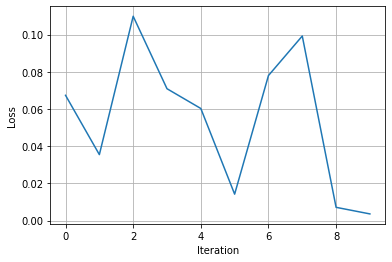

In [ ]:
plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

B.Set learning rate to 0.000001 and fit the model with x_train_69.

In [ ]:
sgd = SGDClassifier(loss = 'log', eta0 = 0.000001, penalty = 'l2', alpha = 0, learning_rate = 'constant', warm_start = True, random_state = 10, max_iter = 1)
pipe = make_pipeline(sgd)
Loss = []
iterations = 10
for i in range(iterations):
  pipe.fit(x_train_69, y_train_69)
  y_pred = sgd.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69, y_pred))
Loss

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[0.007247702945144064,
 0.005086209073727681,
 0.003883883314929383,
 0.0030681564755779987,
 0.002529359907903669,
 0.002087831991269142,
 0.0016959910477317719,
 0.0014038336345746708,
 0.00120814629643334,
 0.0010669212070048423]

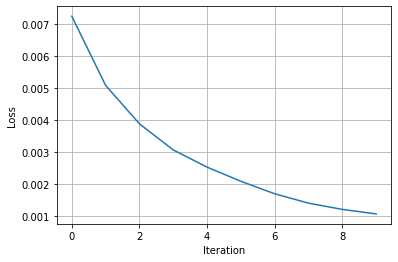

In [ ]:
plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.

In [ ]:
sgd = SGDClassifier(loss = 'log', eta0 = 0.01, penalty = 'l2', alpha = 0,
                    learning_rate = 'constant', warm_start = True, random_state = 10, max_iter = 1)
pipe = make_pipeline(StandardScaler(), sgd)
Loss = []
iterations = 10
for i in range(iterations):
  pipe.fit(x_train_69, y_train_69)
  y_pred = pipe.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69, y_pred))
Loss

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[0.004805694465799851,
 0.0027075473914506595,
 0.0014486912217035186,
 0.0011039293517647957,
 0.0009046172125454562,
 0.000774552569345259,
 0.0006816283932339929,
 0.0006111814728430251,
 0.0005554752798147429,
 0.0005100674372192984]

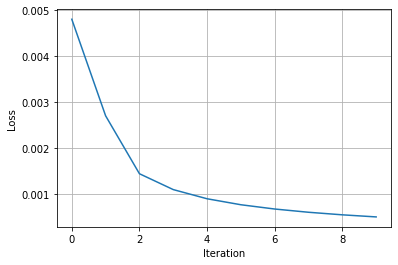

In [ ]:
plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

In [ ]:
sgd = SGDClassifier(loss = 'log', eta0 = 0.01, penalty = 'l2', alpha = 0, learning_rate = 'invscaling', power_t = 1, warm_start = True, random_state = 10, max_iter = 1)
pipe = make_pipeline(sgd)
Loss = []
iterations = 10
for i in range(iterations):
  pipe.fit(x_train_69, y_train_69)
  y_pred = pipe.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69, y_pred))
Loss

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[0.45994846751379603,
 0.4015614143786986,
 0.35455249299143105,
 0.2933293939368558,
 0.273105389378278,
 0.2535448881128582,
 0.23568239294710672,
 0.22545646289153717,
 0.21852854294930427,
 0.21182579487758774]

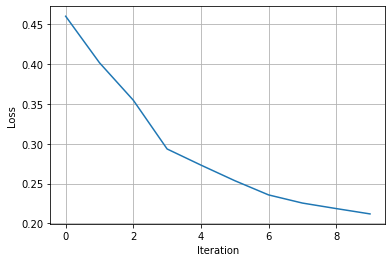

In [ ]:
plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

#Graded Assignment 6

##Question 1
Train the LogisticRegression model using SGDClassifier() with the following common settings.

No Regularization
random_state : 10
Iteration : 30
Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve converged quickly to zero loss?

A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `

B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` . 

C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.

D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).


A. Set Learning rate : 0.01 and plot the curve and fit the model with x_train_69

**Ans: 14**

In [ ]:
sgd_A = SGDClassifier(loss = 'log', penalty = 'l2', warm_start=True,  random_state = 10, max_iter = 1, learning_rate = 'constant', alpha = 0, eta0 = 0.01)

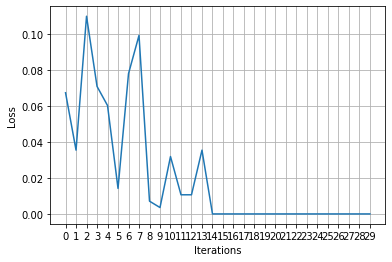

In [ ]:
pipe = make_pipeline(sgd_A)
Loss = []
iterations = 30
for i in range(iterations):
  pipe.fit(x_train_69, y_train_69)
  y_pred = pipe.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.xticks(ticks = np.arange(30), labels = np.arange(30))
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

B.Set learning rate to 0.000001 and fit the model with x_train_69 .

In [ ]:
sgd_B = SGDClassifier(loss = 'log', max_iter = 1, random_state=10, warm_start = True, 
                      eta0 = 0.000001, learning_rate = 'constant', penalty = 'l2', alpha = 0)

<function matplotlib.pyplot.show>

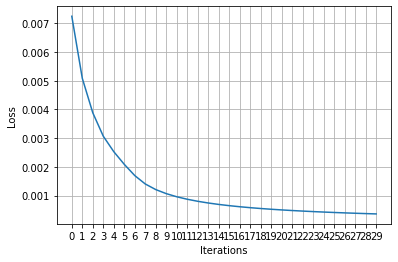

In [ ]:
pipe = make_pipeline(sgd_B)
Loss = []
iterations = 30
for i in range(iterations):
  pipe.fit(x_train_69, y_train_69)
  y_pred = pipe.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.xticks(ticks = np.arange(30), labels = np.arange(30))
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show

C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.

<function matplotlib.pyplot.show>

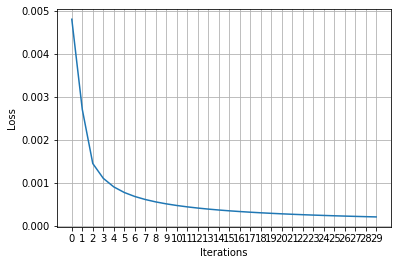

In [ ]:
sgd_c = SGDClassifier(loss = 'log', max_iter = 1, random_state=10, warm_start = True, 
                      eta0 = 0.01, learning_rate = 'constant', penalty = 'l2', alpha = 0)

pipe = make_pipeline(StandardScaler(), sgd_c)
Loss = []
iterations = 30
for i in range(iterations):
  pipe.fit(x_train_69, y_train_69)
  y_pred = pipe.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.xticks(ticks = np.arange(30), labels = np.arange(30))
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show

D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

<function matplotlib.pyplot.show>

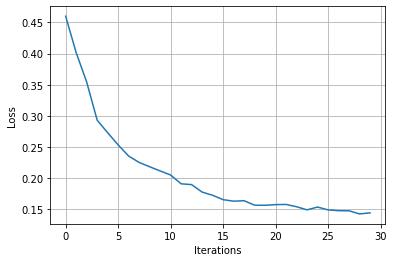

In [ ]:
sgd_D = SGDClassifier(loss = 'log', max_iter = 1, random_state=10, warm_start = True, 
                      eta0 = 0.01, learning_rate = 'invscaling', power_t = 1, penalty = 'l2', alpha = 0)


pipe = make_pipeline(sgd_D)
Loss = []
iterations = 30
for i in range(iterations):
  pipe.fit(x_train_69, y_train_69)
  y_pred = pipe.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), Loss)
#plt.xticks(ticks = np.arange(30), labels = np.arange(30))
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show

##Question 2

In the above question, enter the iteration number for which the loss becomes zero and remains zero for the rest of the iterations.

**Ans: 14**

##Question 3

Create the classifier with the following settings

No Regularization

eta0 = 0.5

learning_rate = 'inv_scaling'

power_t = 0.5

iterations = 10

Shuffle = True

random_state = 10

Train the classifier with x_train_69

Answer the following questions?

How many false positives (FP) are there in the predictions made on training samples?

**Ans: 7**

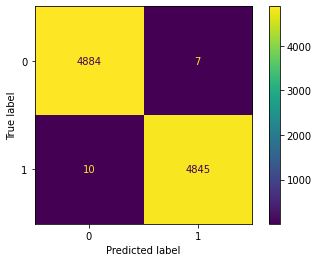

In [ ]:
sgd = SGDClassifier(loss = 'log', eta0 = 0.5, penalty = 'l2', warm_start =False, 
                    learning_rate = 'invscaling', alpha = 0, power_t = 0.5, max_iter = 10, shuffle = True, random_state = 10)
pipe_sgd = make_pipeline(sgd)
pipe_sgd.fit(x_train_69, y_train_69)
y_pred = pipe_sgd.predict(x_train_69)
ConfusionMatrixDisplay.from_predictions(y_train_69, y_pred, labels = [0,1])
plt.show()

##Question 4

Display all the False Positive samples.Could a human recognize them correctly?. Get the index of all FP samples in ascending order. Enter the first index.

**Ans: 2167**

In [ ]:
all_ne_idx = np.where(y_train_69 == 0)
pp_idx = np.where(y_pred == 1)
fp_idx = np.intersect1d(all_ne_idx, pp_idx)
print(fp_idx)

[2167 2407 3036 3368 4217 5556 6230]


##Question 5

Load '20newsgroups' data.
 
Vectorize the data using TfidfVectorizer. What is the shape of X?

(11310, 130507)

(21314, 190807)

(11514, 160107)

(11314, 130107)

**Ans: (11314, 130107)**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X, y = fetch_20newsgroups(return_X_y=True)

In [ ]:
vect = TfidfVectorizer()
X = vect.fit_transform(X)
X.shape

(11314, 130107)

##Question 6
Split the data into train and test using train_test_split with test_size = 0.3 and random_state = 0.

Use MultinomialNB to train the model.

Compute test score.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y , test_size = 0.3, random_state = 0)

In [ ]:
mlt = MultinomialNB()
clf = mlt.fit(X_tr, y_tr)
print(clf.score(X_te, y_te))

0.8427098674521355
